In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
from nltk.tokenize import LineTokenizer

text_file = open("doc10.txt", "r")
corpus = text_file.read()
text_file.close()

corpus = LineTokenizer(blanklines='discard').tokenize(corpus)
labels = ['space', 'cesarean', 'soup', 'cesarean', 'acronyms', 'soup', 'acronyms']
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})

corpus_df

,Document,Category
0,National Aeronautics and Space Administration.,space
1,The cesarean rate in the United States steadil...,cesarean
2,"While soup is simmering, plunge watercress int...",soup
3,One hospital succeeded in reducing the rate of...,cesarean
4,This list is offered as a reference for transl...,acronyms
5,Ladle soup into heated soup bowl. Add watercre...,soup
6,"As of Edition 3 of the list, these acronyms ap...",acronyms


#### Task 1

In [3]:
import re

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')


def preproc_doc(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc


preproc_corpus = np.vectorize(preproc_doc)
p_corpus = preproc_corpus(corpus)
print(p_corpus)

['national aeronautics space administration'
 'cesarean rate united states steadily increased'
 'soup simmering plunge watercress large saucepan simmering water'
 'one hospital succeeded reducing rate cesarean delivery applying objective criteria four common indications cesarean delivery'
 'list offered reference translating commonly appearing acronyms spacerelated newsgroups'
 'ladle soup heated soup bowl add watercress puree soup'
 'edition list acronyms appear multiple lines']


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)

cv_matrix = cv.fit_transform(p_corpus)
cv_matrix = cv_matrix.toarray()

unigrams = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns=unigrams)

,acronyms,add,administration,aeronautics,appear,appearing,applying,bowl,cesarean,common,...,soup,space,spacerelated,states,steadily,succeeded,translating,united,water,watercress
0,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,2,1,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,1,0,0,0,0,0,1,0,0,...,3,0,0,0,0,0,0,0,0,1
6,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

bv = CountVectorizer(ngram_range=(2, 2))

bv_matrix = bv.fit_transform(p_corpus)
bv_matrix = bv_matrix.toarray()

bigrams = bv.get_feature_names_out()
pd.DataFrame(bv_matrix, columns=bigrams)

,acronyms appear,acronyms spacerelated,add watercress,aeronautics space,appear multiple,appearing acronyms,applying objective,bowl add,cesarean delivery,cesarean rate,...,soup simmering,space administration,spacerelated newsgroups,states steadily,steadily increased,succeeded reducing,translating commonly,united states,watercress large,watercress puree
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,2,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
vocab = unigrams.tolist() + bigrams.tolist()
vocab

['acronyms',
 'add',
 'administration',
 'aeronautics',
 'appear',
 'appearing',
 'applying',
 'bowl',
 'cesarean',
 'common',
 'commonly',
 'criteria',
 'delivery',
 'edition',
 'four',
 'heated',
 'hospital',
 'increased',
 'indications',
 'ladle',
 'large',
 'lines',
 'list',
 'multiple',
 'national',
 'newsgroups',
 'objective',
 'offered',
 'one',
 'plunge',
 'puree',
 'rate',
 'reducing',
 'reference',
 'saucepan',
 'simmering',
 'soup',
 'space',
 'spacerelated',
 'states',
 'steadily',
 'succeeded',
 'translating',
 'united',
 'water',
 'watercress',
 'acronyms appear',
 'acronyms spacerelated',
 'add watercress',
 'aeronautics space',
 'appear multiple',
 'appearing acronyms',
 'applying objective',
 'bowl add',
 'cesarean delivery',
 'cesarean rate',
 'common indications',
 'commonly appearing',
 'criteria four',
 'delivery applying',
 'edition list',
 'four common',
 'heated soup',
 'hospital succeeded',
 'indications cesarean',
 'ladle soup',
 'large saucepan',
 'list acron

In [7]:
all_cv = CountVectorizer(ngram_range=(1, 2))

matrix = all_cv.fit_transform(p_corpus)
matrix = matrix.toarray()

ngrams = all_cv.get_feature_names_out()

df = pd.DataFrame(matrix, columns=ngrams)
df

,acronyms,acronyms appear,acronyms spacerelated,add,add watercress,administration,aeronautics,aeronautics space,appear,appear multiple,...,succeeded,succeeded reducing,translating,translating commonly,united,united states,water,watercress,watercress large,watercress puree
0,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
5,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df[['cesarean', 'cesarean delivery', 'cesarean rate']]

,cesarean,cesarean delivery,cesarean rate
0,0,0,0
1,1,0,1
2,0,0,0
3,2,2,0
4,0,0,0
5,0,0,0
6,0,0,0


In [9]:
df[['cesarean delivery']]

,cesarean delivery
0,0
1,0
2,0
3,2
4,0
5,0
6,0


#### Task 2

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True)
tv_matrix = tt.fit_transform(cv_matrix)
tv_matrix = tv_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,acronyms,add,administration,aeronautics,appear,appearing,applying,bowl,cesarean,common,...,soup,space,spacerelated,states,steadily,succeeded,translating,united,water,watercress
0,0.00,0.00,0.5,0.5,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.36,0.00,...,0.00,0.0,0.00,0.43,0.43,0.00,0.00,0.43,0.00,0.00
2,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.27,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.27
3,0.00,0.00,0.0,0.0,0.00,0.00,0.24,0.00,0.40,0.24,...,0.00,0.0,0.00,0.00,0.00,0.24,0.00,0.00,0.00,0.00
4,0.29,0.00,0.0,0.0,0.00,0.35,0.00,0.00,0.00,0.00,...,0.00,0.0,0.35,0.00,0.00,0.00,0.35,0.00,0.00,0.00
5,0.00,0.29,0.0,0.0,0.00,0.00,0.00,0.29,0.00,0.00,...,0.72,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24
6,0.36,0.00,0.0,0.0,0.43,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_matrix

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.21341028, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.26100586, 0.        ],
       [0.        , 0.21341028, 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.20530041],
       [0.        , 0.        , 0.26100586, 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.20530041,
        0.        , 1.        ]])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25]],
 'dcoord': [[0.0, 1.0450955363399115, 1.0450955363399115, 0.0],
  [0.0, 1.1124058509128292, 1.1124058509128292, 0.0],
  [0.0, 1.1238749313708993, 1.1238749313708993, 0.0],
  [0.0, 1.5171792005715206, 1.5171792005715206, 1.1238749313708993],
  [1.1124058509128292,
   1.6757993879539028,
   1.6757993879539028,
   1.5171792005715206],
  [1.0450955363399115,
   1.747714406417285,
   1.747714406417285,
   1.6757993879539028]],
 'ivl': ['2', '5', '1', '3', '0', '4', '6'],
 'leaves': [2, 5, 1, 3, 0, 4, 6],
 'color_list': ['C1', 'C2', 'C3', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2', 'C0', 'C3', 'C3']}

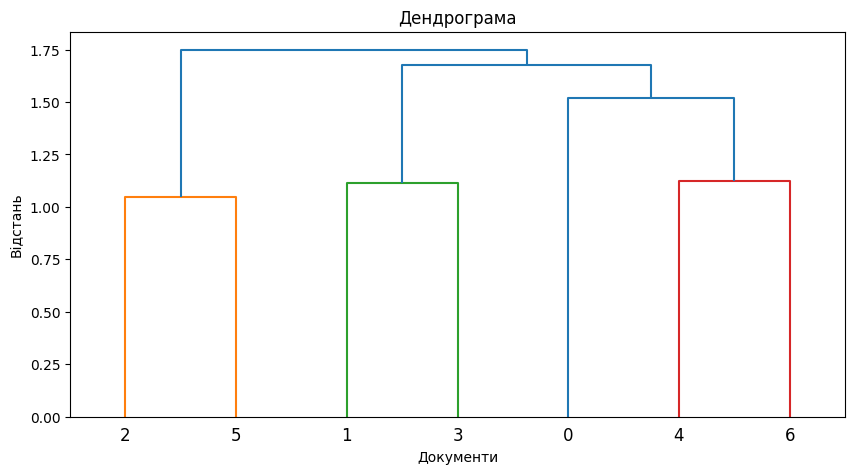

In [12]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

links = linkage(similarity_matrix, 'ward')

plt.figure(figsize=(10, 5))
plt.title('Дендрограма')
plt.xlabel('Документи')
plt.ylabel('Відстань')

dendrogram(links)

In [13]:
from scipy.cluster.hierarchy import fcluster

max_dist = 1.5
cluster_labels = fcluster(links, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,National Aeronautics and Space Administration.,space,4
1,The cesarean rate in the United States steadil...,cesarean,2
2,"While soup is simmering, plunge watercress int...",soup,1
3,One hospital succeeded in reducing the rate of...,cesarean,2
4,This list is offered as a reference for transl...,acronyms,3
5,Ladle soup into heated soup bowl. Add watercre...,soup,1
6,"As of Edition 3 of the list, these acronyms ap...",acronyms,3


#### Task 3

In [14]:
from gensim.models.fasttext import FastText

# wpt = nltk.WordPunctTokenizer()

tokenized_corpus = [wpt.tokenize(document) for document in p_corpus]
tokenized_corpus

[['national', 'aeronautics', 'space', 'administration'],
 ['cesarean', 'rate', 'united', 'states', 'steadily', 'increased'],
 ['soup',
  'simmering',
  'plunge',
  'watercress',
  'large',
  'saucepan',
  'simmering',
  'water'],
 ['one',
  'hospital',
  'succeeded',
  'reducing',
  'rate',
  'cesarean',
  'delivery',
  'applying',
  'objective',
  'criteria',
  'four',
  'common',
  'indications',
  'cesarean',
  'delivery'],
 ['list',
  'offered',
  'reference',
  'translating',
  'commonly',
  'appearing',
  'acronyms',
  'spacerelated',
  'newsgroups'],
 ['ladle',
  'soup',
  'heated',
  'soup',
  'bowl',
  'add',
  'watercress',
  'puree',
  'soup'],
 ['edition', 'list', 'acronyms', 'appear', 'multiple', 'lines']]

In [17]:
ft_model = FastText(tokenized_corpus, vector_size=10, window=5, min_count=1, sample=0.0001, sg=1)

similar_words = {search_term: [item[0] for item in ft_model.wv.most_similar([search_term], topn=5)]
                 for search_term in ['soup', 'acronyms']}
similar_words

{'soup': ['applying', 'space', 'bowl', 'spacerelated', 'large'],
 'acronyms': ['ladle', 'reference', 'four', 'states', 'watercress']}

In [18]:
ft_model.wv.most_similar(positive=['soup', 'acronyms'])[0]

('ladle', 0.646049976348877)